# **Hand Gesture Recognition Model**

In [32]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve, average_precision_score, roc_curve, auc
from PIL import Image
from tqdm import tqdm
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Set random seed
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

# Create images folder for saving plots
os.makedirs('images', exist_ok=True)

print("Libraries imported successfully!")

Libraries imported successfully!


Found subfolders: ['07_ok', '05_thumb', '04_fist_moved', '10_down', '06_index', '01_palm', '09_c', '03_fist', '08_palm_moved', '02_l']
Gesture mapping: {'01_palm': 0, '02_l': 1, '03_fist': 2, '04_fist_moved': 3, '05_thumb': 4, '06_index': 5, '07_ok': 6, '08_palm_moved': 7, '09_c': 8, '10_down': 9}
Collected 2000 images across 10 gestures.


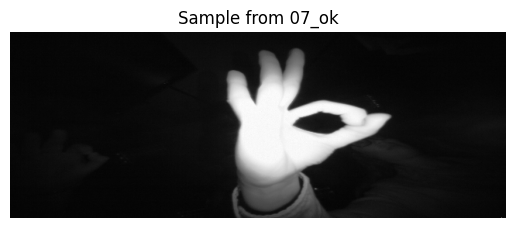

In [33]:
# Define data directory
data_dir = '/content/archive/00'  # Path to your uploaded folder

# Get all subfolders under '00' (assuming they represent gestures)
gesture_folders = [f for f in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, f))]
print(f"Found subfolders: {gesture_folders}")  # Debug

# Dynamically map subfolders to labels (0 to 9 based on order found)
gesture_mapping = {folder: i for i, folder in enumerate(sorted(gesture_folders))}
gesture_names = list(gesture_mapping.keys())
print(f"Gesture mapping: {gesture_mapping}")  # Debug

# Collect up to 200 images per gesture folder
image_paths = []
labels = []

for folder in gesture_folders:
    gesture_path = os.path.join(data_dir, folder)
    imgs = [os.path.join(gesture_path, f) for f in os.listdir(gesture_path) if f.endswith(('.png', '.jpg'))]
    random.shuffle(imgs)
    selected_imgs = imgs[:200]  # Take up to 200 images
    for img_path in selected_imgs:
        image_paths.append(img_path)
        labels.append(gesture_mapping[folder])

print(f"Collected {len(image_paths)} images across {len(gesture_folders)} gestures.")
# Test: Display sample image
sample_img = Image.open(image_paths[0]).convert('L')
plt.imshow(sample_img, cmap='gray')
plt.title(f"Sample from {os.path.basename(os.path.dirname(image_paths[0]))}")
plt.axis('off')
plt.show()

Loading and preprocessing images...


100%|██████████| 2000/2000 [00:06<00:00, 331.50it/s]


Dataset shape: (2000, 64, 64, 1), Labels shape: (2000, 10)


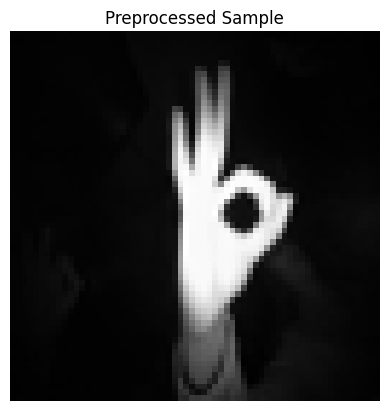

In [34]:
def load_and_preprocess_image(file_path, target_size=(64, 64)):
    img = Image.open(file_path).convert('L')  # Grayscale
    img = img.resize(target_size)
    img_array = np.array(img) / 255.0  # Normalize
    return img_array

X = []
y = []

print("Loading and preprocessing images...")
for path, label in tqdm(zip(image_paths, labels), total=len(image_paths)):
    X.append(load_and_preprocess_image(path))
    y.append(label)

X = np.array(X).reshape(-1, 64, 64, 1)  # Add channel dimension for CNN
y = to_categorical(np.array(y), num_classes=10)  # One-hot encode

print(f"Dataset shape: {X.shape}, Labels shape: {y.shape}")
# Test: Display preprocessed sample
plt.imshow(X[0].reshape(64, 64), cmap='gray')
plt.title("Preprocessed Sample")
plt.axis('off')
plt.show()

Training set: 1600 samples
Test set: 400 samples


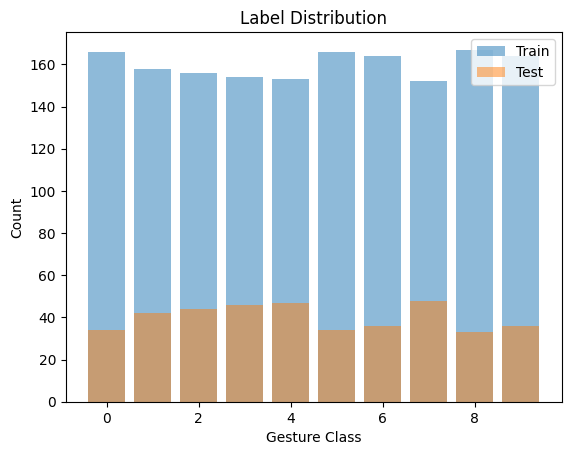

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
# Test: Check label distribution
train_labels = np.argmax(y_train, axis=1)
test_labels = np.argmax(y_test, axis=1)
plt.bar(range(10), np.bincount(train_labels), alpha=0.5, label='Train')
plt.bar(range(10), np.bincount(test_labels), alpha=0.5, label='Test')
plt.xlabel('Gesture Class')
plt.ylabel('Count')
plt.title('Label Distribution')
plt.legend()
plt.show()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training CNN model...
Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 8s 164ms/step - accuracy: 0.3737 - loss: 1.8003 - val_accuracy: 0.9875 - val_loss: 0.1011
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 11s 182ms/step - accuracy: 0.9598 - loss: 0.1593 - val_accuracy: 0.9969 - val_loss: 0.0168
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 186ms/step - accuracy: 0.9878 - loss: 0.0590 - val_accuracy: 1.0000 - val_loss: 0.0054
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 165ms/step - accuracy: 0.9961 - loss: 0.0227 - val_accuracy: 1.0000 - val_loss: 0.0044
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 8s 192ms/step - accuracy: 0.9920 - loss: 0.0257 - val_accuracy: 1.0000 - val_loss: 0.0015
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 182ms/step - accuracy: 0.9951 - loss: 0.0185 - val_accuracy: 1.0000 - val_loss: 4.7373e-04
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 8s 194ms/step - accuracy: 0.9946 - loss: 0.0122 - val_accuracy: 1.0000 - val_loss: 0.0015
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 187ms/step - accuracy: 0.9972 - lo

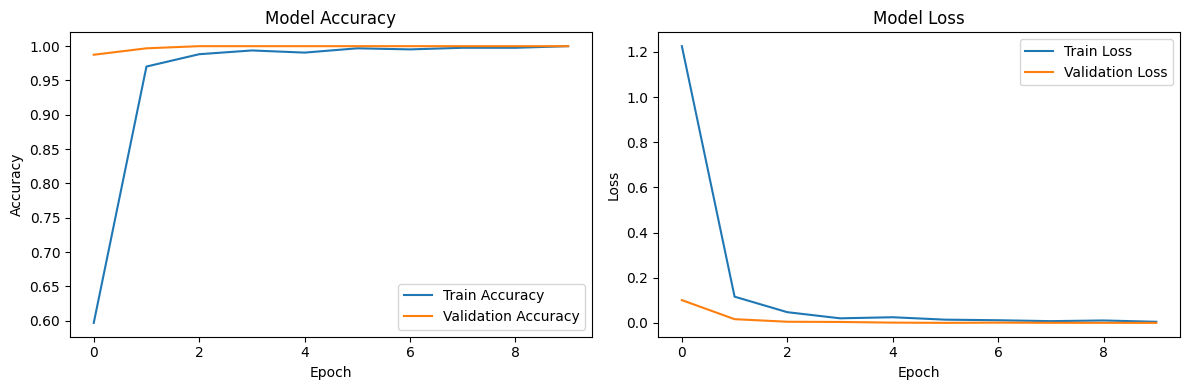

In [36]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print("Training CNN model...")
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)
print("Model training completed!")

# Visualize training progress
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

In [37]:
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test, axis=1)
accuracy = accuracy_score(y_true, y_pred)
print(f"\nTest Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=gesture_names))
# Test: Display some prediction probabilities
sample_indices = np.random.choice(len(y_test), 5, replace=False)
for i in sample_indices:
    print(f"Sample {i}: True={gesture_names[y_true[i]]}, Pred={gesture_names[y_pred[i]]}, Prob={y_pred_prob[i]}")
print(classification_report(y_true, y_pred, target_names=gesture_names))

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step

Test Accuracy: 100.00%

Classification Report:
               precision    recall  f1-score   support

      01_palm       1.00      1.00      1.00        34
         02_l       1.00      1.00      1.00        42
      03_fist       1.00      1.00      1.00        44
04_fist_moved       1.00      1.00      1.00        46
     05_thumb       1.00      1.00      1.00        47
     06_index       1.00      1.00      1.00        34
        07_ok       1.00      1.00      1.00        36
08_palm_moved       1.00      1.00      1.00        48
         09_c       1.00      1.00      1.00        33
      10_down       1.00      1.00      1.00        36

     accuracy                           1.00       400
    macro avg       1.00      1.00      1.00       400
 weighted avg       1.00      1.00      1.00       400

Sample 209: True=07_ok, Pred=07_ok, Prob=[4.5483182e-14 5.1191522e-13 3.4014426e-18 1.1345599e-20 1.0251171e-15
 4.8700840e-14 9.9999994e-0

<Figure size 1000x800 with 0 Axes>

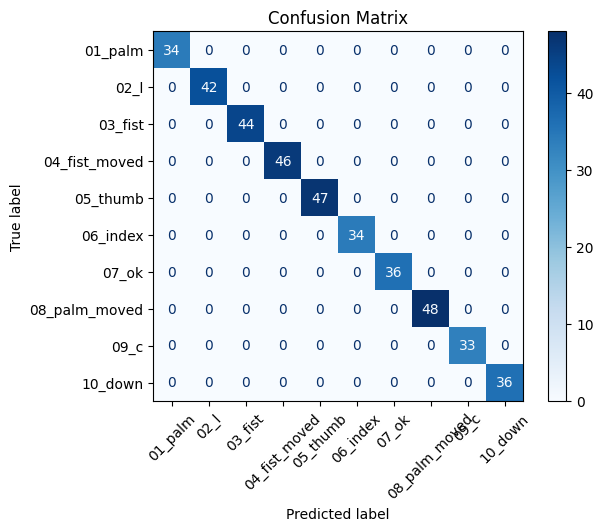

In [38]:
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
ConfusionMatrixDisplay(cm, display_labels=gesture_names).plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.xticks(rotation=45)
plt.savefig('/content/images/confusion_matrix.png')
plt.show()

Class 0 - Average Precision: 1.00
Class 1 - Average Precision: 1.00
Class 2 - Average Precision: 1.00
Class 3 - Average Precision: 1.00
Class 4 - Average Precision: 1.00
Class 5 - Average Precision: 1.00
Class 6 - Average Precision: 1.00
Class 7 - Average Precision: 1.00
Class 8 - Average Precision: 1.00
Class 9 - Average Precision: 1.00
Macro-average Precision: 1.00


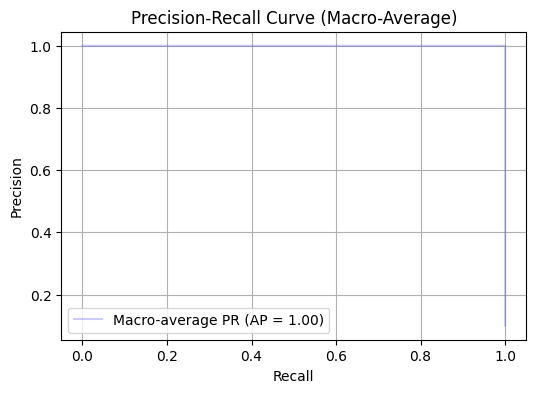

In [39]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision = dict()
recall = dict()
average_precision = dict()
n_classes = y_pred_prob.shape[1]

for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i], y_pred_prob[:, i])
    average_precision[i] = average_precision_score(y_test[:, i], y_pred_prob[:, i])
    print(f"Class {i} - Average Precision: {average_precision[i]:.2f}")

precision["macro"], recall["macro"], _ = precision_recall_curve(y_test.ravel(), y_pred_prob.ravel())
average_precision["macro"] = average_precision_score(y_test, y_pred_prob, average='macro')
print(f"Macro-average Precision: {average_precision['macro']:.2f}")

plt.figure(figsize=(6, 4))
plt.step(recall["macro"], precision["macro"], color='b', alpha=0.2,
         where='post', label=f'Macro-average PR (AP = {average_precision["macro"]:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Macro-Average)')
plt.legend(loc="best")
plt.grid(True)
plt.savefig('/content/images/precision_recall_curve.png')
plt.show()
plt.close()

Class 0 - ROC AUC: 1.00
Class 1 - ROC AUC: 1.00
Class 2 - ROC AUC: 1.00
Class 3 - ROC AUC: 1.00
Class 4 - ROC AUC: 1.00
Class 5 - ROC AUC: 1.00
Class 6 - ROC AUC: 1.00
Class 7 - ROC AUC: 1.00
Class 8 - ROC AUC: 1.00
Class 9 - ROC AUC: 1.00
Macro-average ROC AUC: 1.00


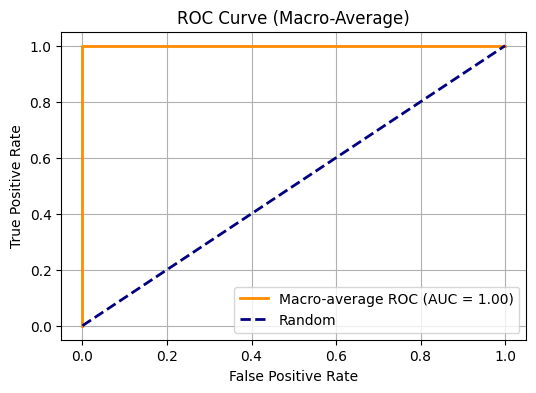

In [40]:
from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_pred_prob.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    print(f"Class {i} - ROC AUC: {roc_auc[i]:.2f}")

fpr["macro"], tpr["macro"], _ = roc_curve(y_test.ravel(), y_pred_prob.ravel())
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
print(f"Macro-average ROC AUC: {roc_auc['macro']:.2f}")

plt.figure(figsize=(6, 4))
plt.plot(fpr["macro"], tpr["macro"], color='darkorange', lw=2,
         label=f'Macro-average ROC (AUC = {roc_auc["macro"]:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Macro-Average)')
plt.legend(loc="best")
plt.grid(True)
plt.savefig('/content/images/roc_curve.png')
plt.show()
plt.close()

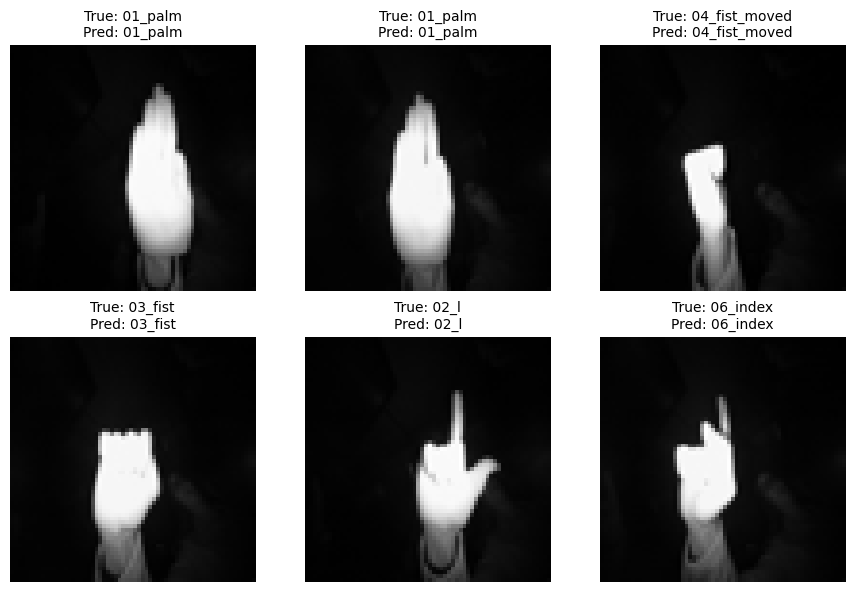

Image grid displayed and saved to /content/images/image_grid.png


In [41]:
def visualize_predictions_grid(X_test, y_true, y_pred, gesture_names, num_rows=2, num_cols=3):
    num_samples = num_rows * num_cols
    indices = random.sample(range(len(X_test)), num_samples)
    plt.figure(figsize=(num_cols * 3, num_rows * 3))
    for i, idx in enumerate(indices):
        img = X_test[idx].reshape(64, 64)
        true_label = gesture_names[y_true[idx]]
        pred_label = gesture_names[y_pred[idx]]
        plt.subplot(num_rows, num_cols, i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(f"True: {true_label}\nPred: {pred_label}", fontsize=10)
        plt.axis('off')
    plt.tight_layout()
    plt.savefig('/content/images/image_grid.png')
    plt.show()  # Ensure display in Colab
    print("Image grid displayed and saved to /content/images/image_grid.png")

visualize_predictions_grid(X_test, y_true, y_pred, gesture_names)